In [94]:
N = 1000
totient = [0] * (N+1)
sigma = [0] * (N+1)

with open("data.csv") as h:
    for line in h.read().split("\n"):
        a, b, c = map(int, line.split(" "))
        totient[a] = b
        sigma[a] = c
        if a == N: break


In [95]:
import math

# Define our function f(w) = sigma^w * totient^(1-w)
def f(w, n):
    # Instead of direct exponentiation, we use logs for numerical stability.
    return math.exp((1-w)*math.log(totient[n]) + w*math.log(sigma[n]))

# Its derivative f'(w) = f(w) * (log(sigma)-log(totient))
def fprime(w, n):
    return f(w, n) * (math.log(sigma[n]) - math.log(totient[n]))

# Newton's method to solve f(w) = n
def newton_solve_f(n, initial=0.5, tol=1e-10, max_iter=100):
    if totient[n] == sigma[n]:
        return 0 if totient[n] == n else None
    w = initial
    for _ in range(max_iter):
        fw = f(w, n) - n
        fpw = fprime(w, n)
        if fpw == 0:
            return None
        w_new = w - fw / fpw
        if abs(w_new - w) < tol:
            return max(0, min(1, w_new))
        w = w_new
    return None

In [96]:
import math

def g(w, n):
    return (1-w)*totient[n] + w*sigma[n]

# Its derivative f'(w) = f(w) * (log(sigma)-log(totient))
def gprime(w, n):
    return sigma[n] - totient[n]

# Newton's method to solve f(w) = n
def newton_solve_g(n, initial=0.5, tol=1e-10, max_iter=100):
    if totient[n] == sigma[n]:
        return 0 if totient[n] == n else None
    w = initial
    for _ in range(max_iter):
        gw = g(w, n) - n
        gpw = gprime(w, n)
        if gpw == 0:
            return None
        w_new = w - gw / gpw
        if abs(w_new - w) < tol:
            return max(0, min(1, w_new))
        w = w_new
    return None

In [97]:
# Compute the w value for each n
results = {}
for n in range(1, N+1):
    results[n] = newton_solve_g(n)

In [98]:
results[3*331]

0.49850299401197606

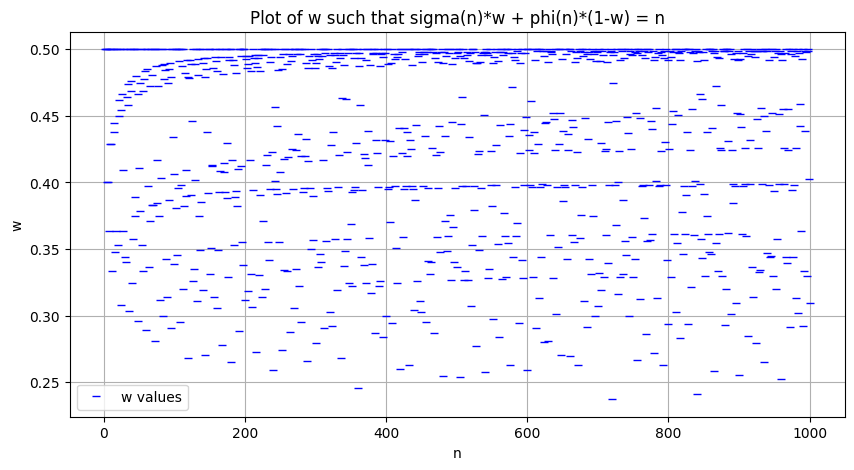

In [99]:
import matplotlib.pyplot as plt

# Extract data for plotting
valid_n = [n for n in range(2, N+1) if results[n] is not None]
valid_w = [results[n] for n in valid_n]

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(valid_n, valid_w, "_", color='blue', label='w values', )
plt.xlabel('n')
plt.ylabel('w')
plt.title('Plot of w such that sigma(n)*w + phi(n)*(1-w) = n')
plt.legend()
plt.grid()
plt.show()